# Part 2: Characterizing population-specific TR variation

This notebook generates the items listed below. For preprocessing see:
* `../size-stats/readme.sh`: summarizes allele frequency info across loci

Figures:

Supplementary Figures:

Statistics:


In [5]:
####### Set up #########
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import numpy as np
import os
import pandas as pd
import seaborn as sns

PLOTDIR = "pdfs"

def GetSuperpopColors(spop):
    if "EUR" in spop: return "blue"
    if "AFR" in spop: return "gold"
    if "AMR" in spop: return "red"
    if "EAS" in spop: return "green"
    if "SAS" in spop: return "purple"
    if "H3" in spop: return "gray"

Populating the interactive namespace from numpy and matplotlib


# Figure 2a-b: distribution of diff from ref

In [14]:
byspop

,spop,type,-11,-10,-9,-8,-7,-6,-5,-4,...,2,3,4,5,6,7,8,9,10,11
1,0_EUR,other,1415937,465459,602421,864961,1259899,1817204,2709595,4159480,...,13247808,6839935,4289397,2733392,1874051,1303083,907712,645491,492552,1394560
3,1_EAS,other,1350142,423036,570777,810978,1195319,1727551,2548151,3934774,...,12602531,6570029,4071457,2608496,1814299,1248700,874772,619460,469135,1339748
5,2_SAS,other,1375136,443319,584546,837710,1234764,1773068,2613904,4050587,...,12820630,6661782,4161818,2649643,1820766,1269835,877719,628715,479785,1352351
7,3_AMR,other,1109574,364853,478028,680220,998162,1442219,2136247,3291635,...,10402963,5399476,3396325,2164985,1490470,1033385,723572,507077,388715,1112250
9,4_AFR,other,2223485,732946,992992,1405499,2056553,2982489,4419818,6779947,...,20863675,11016278,6949743,4492442,3085709,2133009,1502424,1078528,802808,2310754
11,5_H3Africa,other,884694,288597,396314,557667,815351,1184484,1750838,2684562,...,8083438,4288323,2702116,1746690,1197771,824214,573313,409628,304086,818054


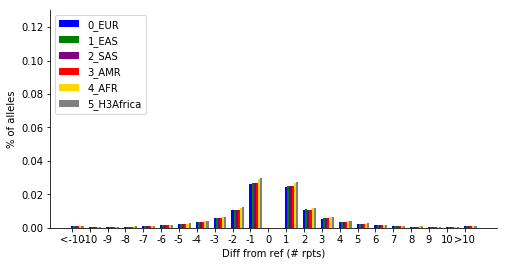

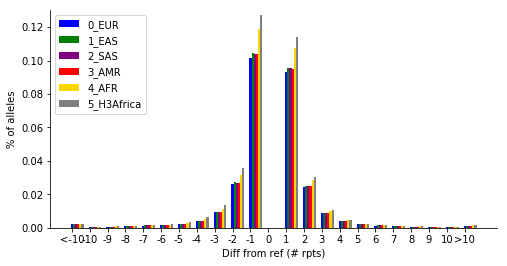

In [20]:
# Load data, sum across all chromosomes
# data gives counts of allele sizes in each sample,
# separately for homopolymers/non-homopolymers
dfs = []
sizecols = list(range(-11, 12))
for chrom in range(1, 22):
    data = pd.read_csv("../size-stats/asize_summary_chr%s.tab"%chrom, sep="\t", 
                  names=["sample","spop","pop","type"] + sizecols)
    dfs.append(data)
data = pd.concat(dfs)

# Aggregate by summarizing across samples/chromosomes
aggdict = {}
for i in sizecols: aggdict[i] = np.sum
data = data.groupby(["spop","type"], as_index=False).agg(aggdict)

w = 0.12
for vtype in ["other","hom"]:
    byspop = data[data["type"]==vtype].copy()
    byspop.index = byspop["spop"]
    byspop = byspop.drop(["spop","type"], 1)
    byspop = byspop.div(byspop.sum(axis=1), axis=0)
    byspop[0] = np.nan

    fig = plt.figure()
    fig.set_size_inches((8, 4))
    ax = fig.add_subplot(111)
    i = 0
    for spop in sorted(list(byspop.index)):
        vals = byspop.loc[spop]
        color = GetSuperpopColors(spop)
        ax.bar([item+w*i for item in sizecols], vals, color=color, label=spop, width=w)
        i += 1
    ax.legend(loc="upper left")
    ax.set_xticks(sizecols)
    ax.set_xticklabels(["<-10"]+list(range(-10, 11)) + [">10"])
    ax.set_xlabel("Diff from hg38 (# rpts)")
    ax.set_ylabel("% of alleles")
    ax.set_ylim(bottom=0, top=0.13)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if vtype == "other":
        figname = "Figure2a-DiffFromRef-Nonhomopolymer.pdf"
    else:
        figname = "Figure2a-DiffFromRef-Homopolymer.pdf"
    fig.savefig(os.path.join(PLOTDIR, figname))